# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import apikey

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={apikey}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")

    # If theres an error, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | port victoria
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | richards bay
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | benjamin aceval
Processing Record 15 of Set 1 | ta`u
Processing Record 16 of Set 1 | sumbawa besar
Processing Record 17 of Set 1 | alo
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | sarmiento
Processing Record 22 of Set 1 | port-aux-francais
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,21.96,79,30,6.45,MU,1721776965
1,chonchi,-42.6128,-73.8092,8.40,87,96,1.99,CL,1721776966
2,waitangi,-43.9535,-176.5597,9.34,99,100,4.92,NZ,1721776967
3,ribeira grande,38.5167,-28.7000,23.21,83,4,3.13,PT,1721776967
4,adamstown,-25.0660,-130.1015,18.77,65,90,10.59,PN,1721776968


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,21.96,79,30,6.45,MU,1721776965
1,chonchi,-42.6128,-73.8092,8.40,87,96,1.99,CL,1721776966
2,waitangi,-43.9535,-176.5597,9.34,99,100,4.92,NZ,1721776967
3,ribeira grande,38.5167,-28.7000,23.21,83,4,3.13,PT,1721776967
4,adamstown,-25.0660,-130.1015,18.77,65,90,10.59,PN,1721776968


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

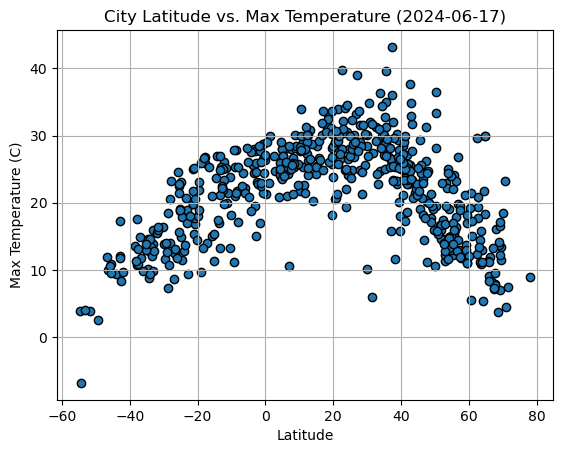

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

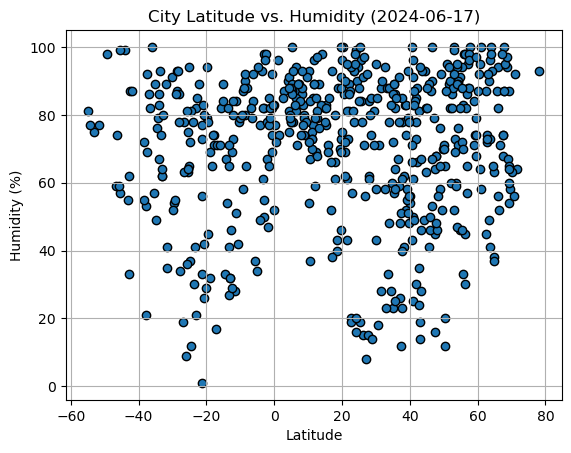

In [77]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

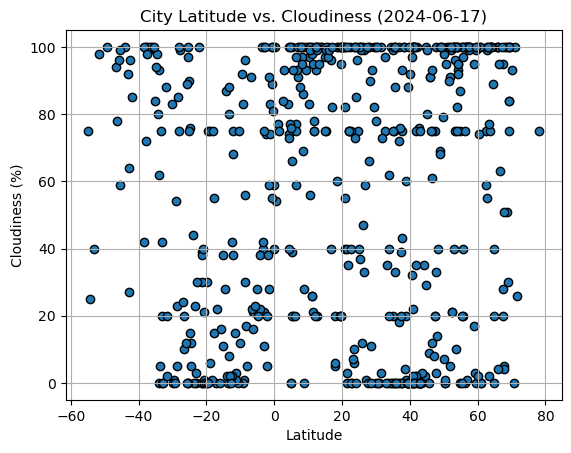

In [78]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

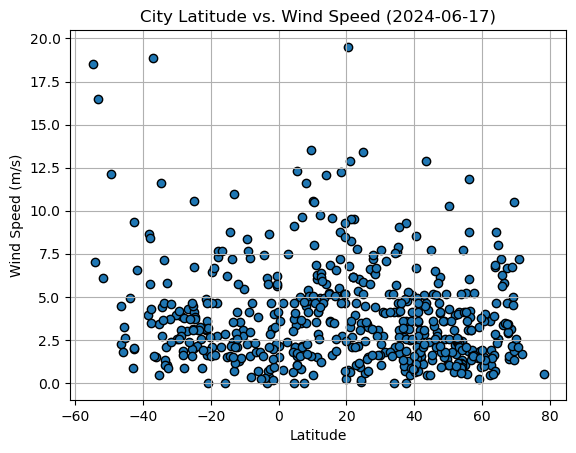

In [79]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


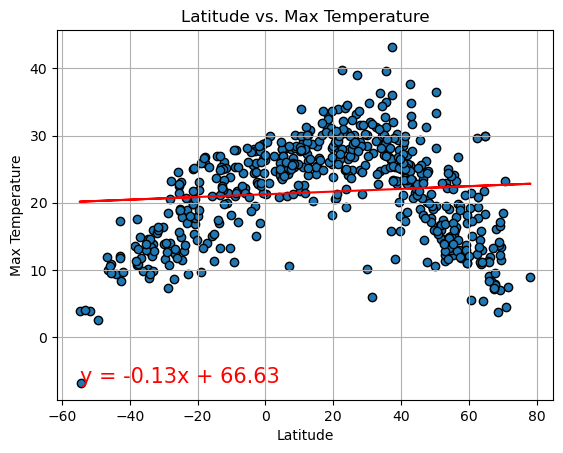

In [85]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title):

    # Labels and titles
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot and regression line
    plt.plot(x_values, regress_values, "r-", label = line_equation)
    plt.scatter(x_values, y_values, edgecolors = 'black')
    
    # Annotate the line equation
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize = 15, color = "red")

    # Show plot
    plt.show()
    
linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature', 'Latitude vs. Max Temperature')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ribeira grande,38.5167,-28.7000,23.21,83,4,3.13,PT,1721776967
6,port victoria,0.0939,33.9756,21.23,77,100,2.13,KE,1721776815
7,tazovsky,67.4667,78.7000,7.68,68,95,6.68,RU,1721776969
9,isafjordur,66.0755,-23.1240,9.10,94,100,3.39,IS,1721776970
11,cabo san lucas,22.8909,-109.9124,32.17,57,0,4.63,MX,1721776972


In [21]:
# Create a DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,21.96,79,30,6.45,MU,1721776965
1,chonchi,-42.6128,-73.8092,8.40,87,96,1.99,CL,1721776966
2,waitangi,-43.9535,-176.5597,9.34,99,100,4.92,NZ,1721776967
4,adamstown,-25.0660,-130.1015,18.77,65,90,10.59,PN,1721776968
5,margaret river,-33.9500,115.0667,12.71,67,93,7.12,AU,1721776968


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3870724537675216


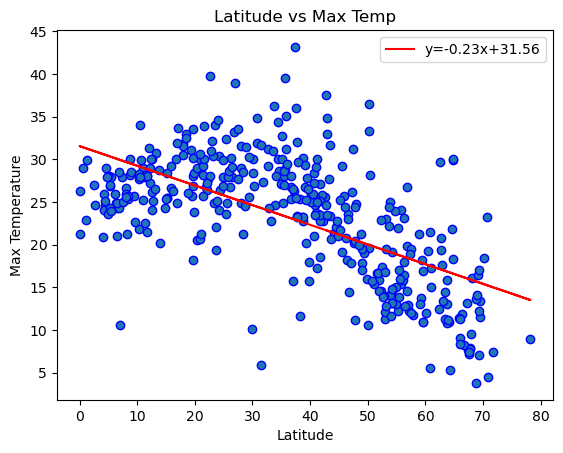

In [38]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs Max Temp')

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors = 'blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (0, 0), fontsize = 15, color = "red")

# Show plot
plt.legend()
plt.show()

The r-squared is: 0.6039987720607842


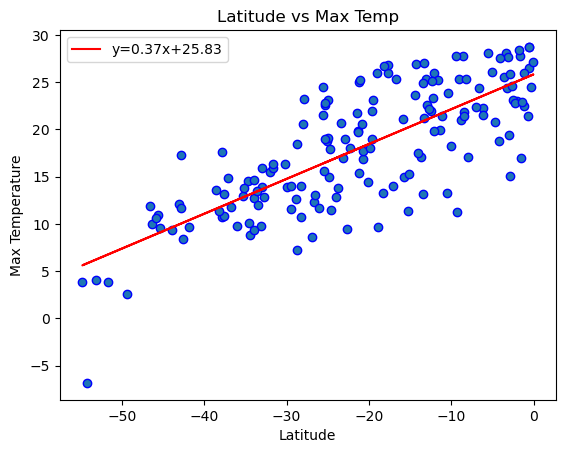

In [41]:
# Linear regression on Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs Max Temp')

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors = 'blue')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50, 90), fontsize = 15, color = "red")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004524329784058212


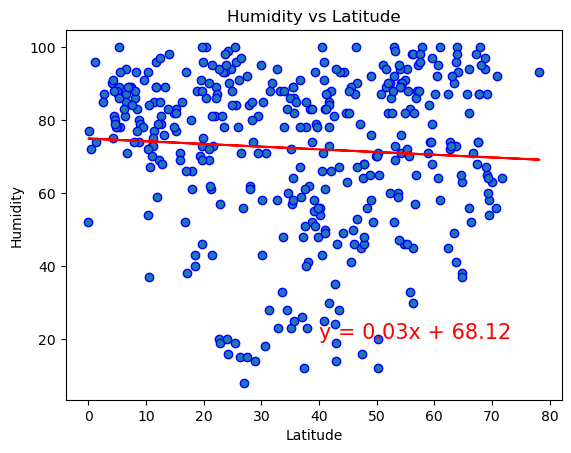

In [46]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude')

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors = 'blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (40, 20), fontsize = 15, color = "red")

# Show plot
plt.show()

The r-squared is: 0.00046055523367382993


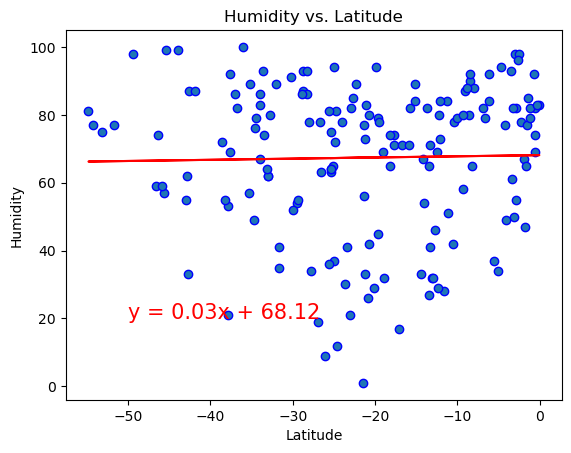

In [47]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors = 'blue')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both plots have a low correlation, the Northern hemisphere has a r-value of 0.004524329784058212 and the Southern hemisphere has a r-value of 0.00046055523367382993. This suggests that there is no significant correlatiopn between latitude and humidity in any hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004300819555263454


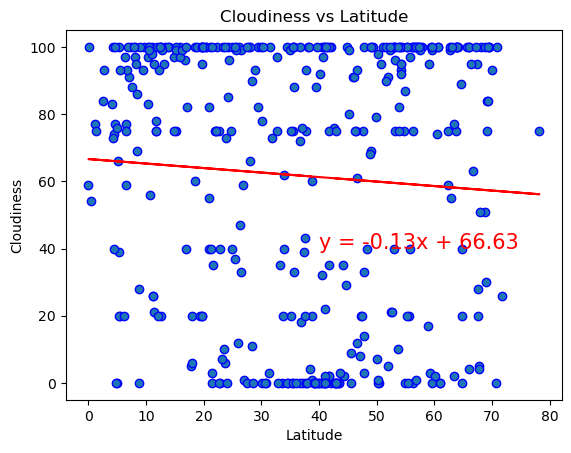

In [86]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude')

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors = 'blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (40, 40), fontsize = 15, color = "red")

# Show plot
plt.show()

The r-squared is: 0.05070149031499886


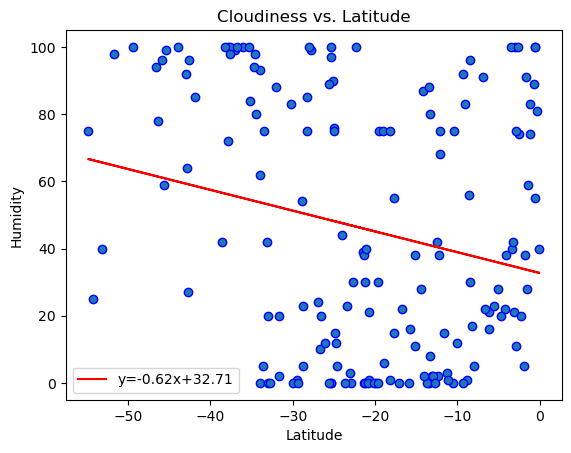

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Cloudiness vs. Latitude')

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors = 'blue')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (40, 20), fontsize = 15, color = "red")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** Both r-values are low in each hemisphere. The Northern hemisphere has an r-value of 0.004300819555263454 and the Southern hemisphere has an r-value of 0.05070149031499886. This means there is no significant correlation of hemispheres between latitude and cloudiness to the linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0366222304492599


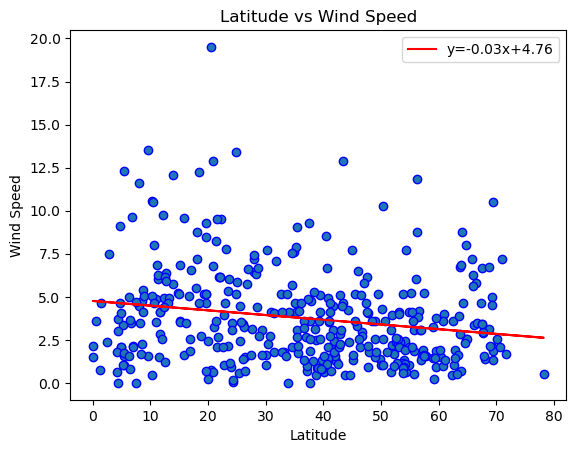

In [69]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Plot the data and the regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors = 'blue')
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20, 30), fontsize=15, color = "red")

# Show plot
plt.legend()
plt.show()

The r-squared is: 0.07774578450087659


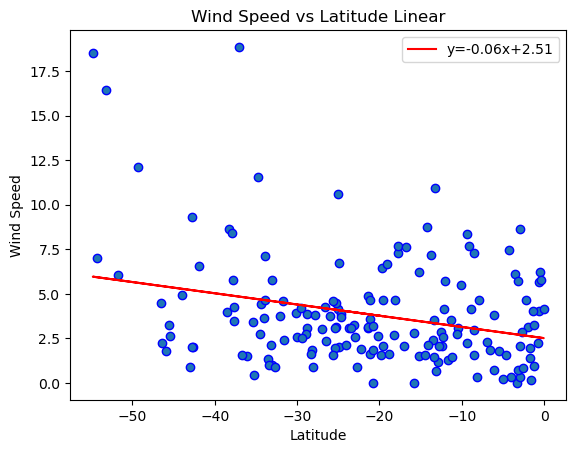

In [72]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude Linear')

# Plot the data and the regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='blue')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Annotate the line equation
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** The Northern hemispher has an r-value of 0.0366222304492599 and the Southern hemisphere has an r-value of 0.07774578450087659. The Southern hemisphere has an r-value of 0.07774578450087659. This demonstrates that there is no significant correlation of hemispheres between latitude and cloudiness to the linear relationship. 